In [ ]:
# Зміна максимальної денної зарплати водія (різниця з поперднім днем)
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag, sqrt, pow, sum as spark_sum
from pyspark.sql.window import Window
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder \
    .appName("TestApp") \
    .config("spark.driver.memory", "10g") \
    .config("spark.executor.memory", "10g") \
    .getOrCreate()

df_fare = spark.read.option("inferSchema", True).option("header", True).parquet("/Users/mac/Development/nyc-taxi-spark-project/trip_fare_cleaned.parquet")
df_trip = spark.read.option("inferSchema", True).option("header", True).parquet("/Users/mac/Development/nyc-taxi-spark-project/trip_data_cleaned.parquet")


In [ ]:
from pyspark.sql.functions import to_date, sum as spark_sum, max as spark_max, avg as spark_avg, lag
from pyspark.sql.window import Window

df = df_fare.withColumn("pickup_date", to_date("pickup_datetime"))

driver_daily_wage = df.groupBy("hack_license", "pickup_date") \
    .agg(spark_sum("total_amount").alias("daily_wage"))

daily_max_wage = driver_daily_wage.groupBy("pickup_date") \
    .agg(spark_max("daily_wage").alias("max_wage"))

w = Window.orderBy("pickup_date")
daily_diff = daily_max_wage.withColumn("prev_max_wage", lag("max_wage").over(w)) \
    .withColumn("wage_diff", col("max_wage") - col("prev_max_wage"))

pdf = daily_diff.orderBy("pickup_date").toPandas()


25/04/16 23:03:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:03:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:03:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:03:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:03:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:03:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 2

/var/folders/vz/rgbmjfqn0nq0nvl3m3c5by_00000gn/T/ipykernel_20524/781917232.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




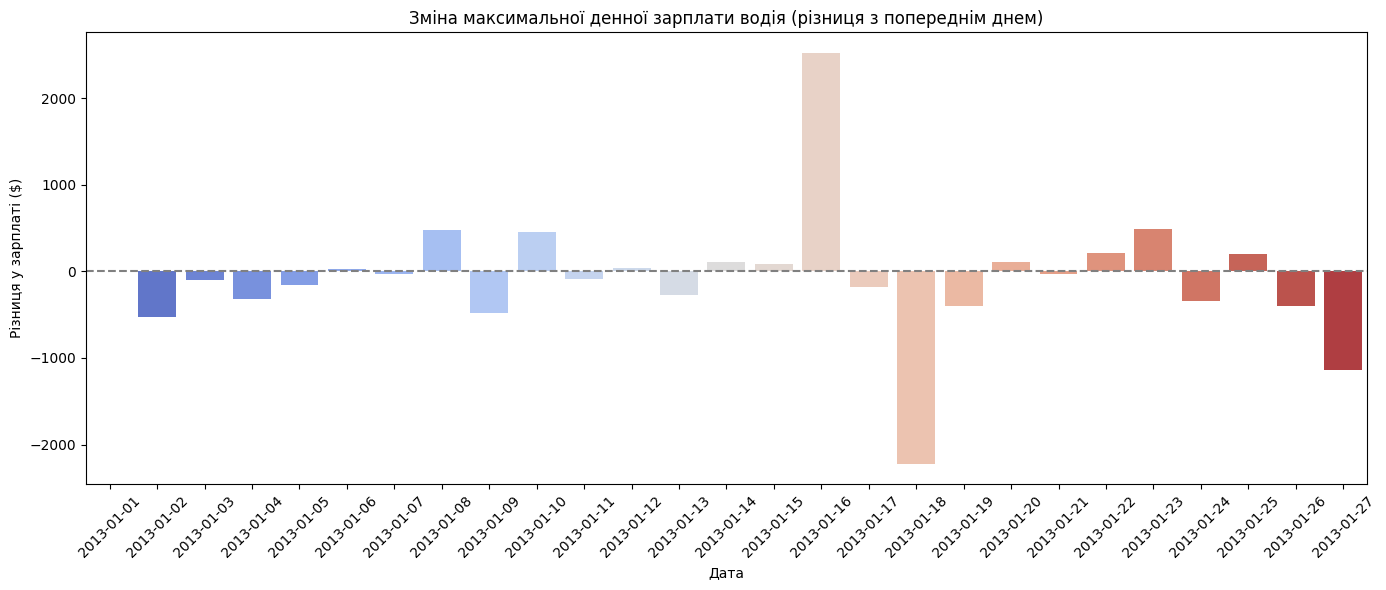

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

sns.barplot(data=pdf, x="pickup_date", y="wage_diff", palette="coolwarm", dodge=False)

plt.axhline(0, color="gray", linestyle="--")
plt.title("Зміна максимальної денної зарплати водія (різниця з попереднім днем)")
plt.xlabel("Дата")
plt.ylabel("Різниця у зарплаті ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
daily_diff.write.option("header", True).mode("overwrite").csv("/Users/mac/Development/nyc-taxi-spark-project/results/2.csv")

25/04/16 23:07:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:07:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:07:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:07:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:07:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 23:07:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/04/16 2